#Name: Mann Dsylva
#Roll no: 24MAI009

#Practical 9 : Long short term memory(LSTM) and Bidirectional LSTM

#**1) LSTM**

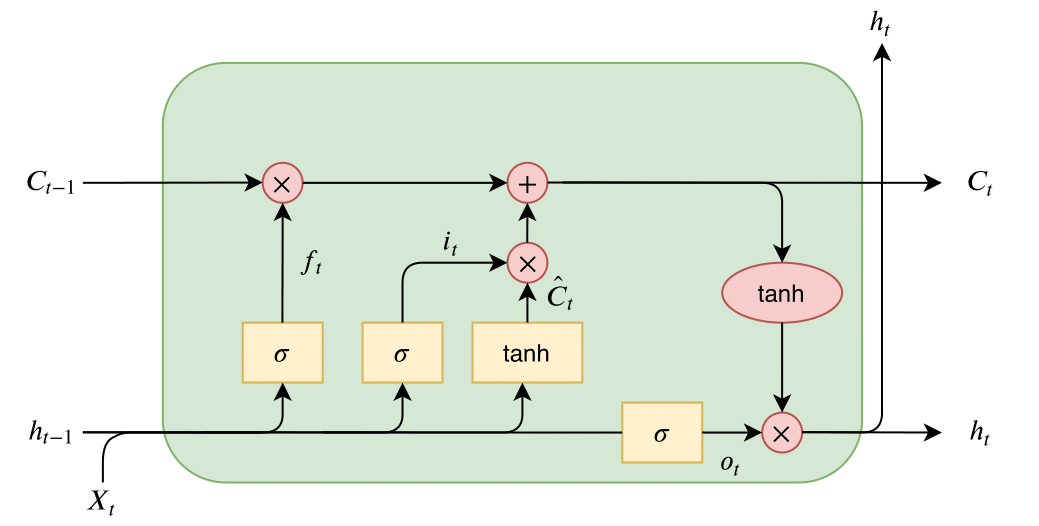

[*********************100%***********************]  1 of 1 completed

Epoch 1/70



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188
Epoch 2/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.6125e-04
Epoch 3/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0140e-04
Epoch 4/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3230e-04
Epoch 5/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9859e-04
Epoch 6/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9460e-04
Epoch 7/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9195e-04
Epoch 8/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7357e-04
Epoch 9/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7964e-04
Epoch 10/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0969e-04
Epoch 11/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5644e-04
Epoch 12/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.4499e-04
Epoch 13/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3157e-04
Epoch 14/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.0677e-04
Epoch 15/70
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 9

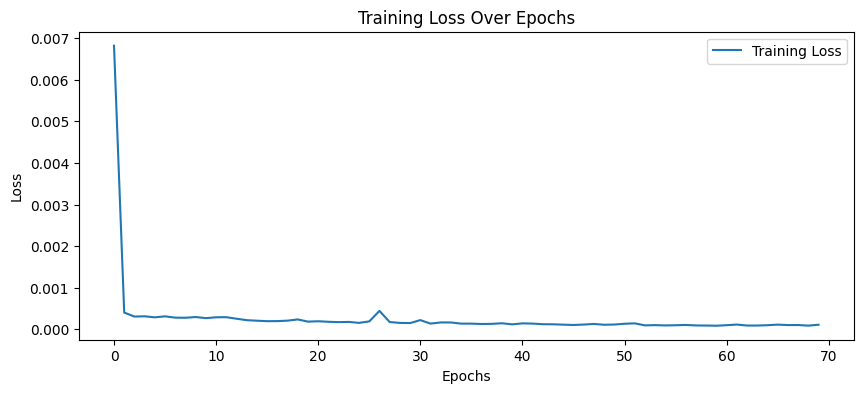

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


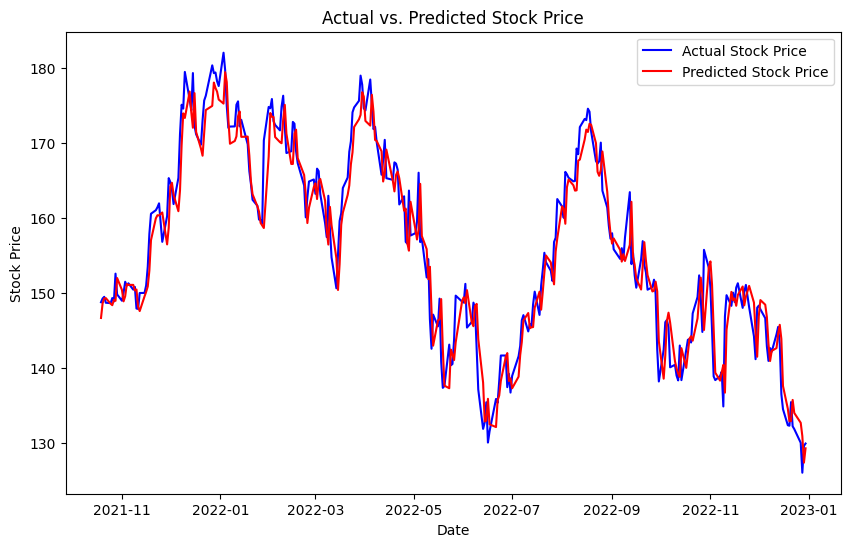

Test MSE Loss: 11.701683081041217


In [5]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Load dataset
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start="2015-01-01", end="2023-01-01")
data = data[['Close']]

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare training data
sequence_length = 100
X_train = []
y_train = []
for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#LSTM model
model = Sequential()
model.add(LSTM(units=70, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=70))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1)

#training loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Prepare test data
X_test = []
y_test = data[train_size + sequence_length:]['Close'].values  # Actual test labels
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict on test data
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + sequence_length:], y_test, label='Actual Stock Price', color='blue')
plt.plot(data.index[train_size + sequence_length:], predicted_prices, label='Predicted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Price')
plt.legend()
plt.show()

# test loss
test_loss = mean_squared_error(y_test, predicted_prices)
print("Test MSE Loss:", test_loss)

#**Bidirectional LSTM**

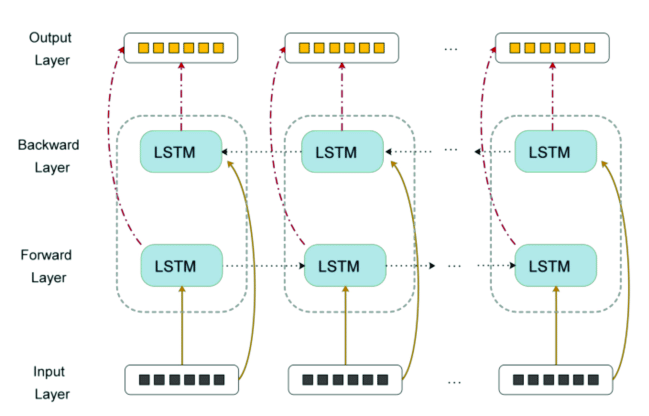

[*********************100%***********************]  1 of 1 completed

Epoch 1/70



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.1099
Epoch 2/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 8.4204e-04
Epoch 3/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.3528e-04
Epoch 4/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.0867e-04
Epoch 5/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.8639e-04
Epoch 6/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.2843e-04
Epoch 7/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 2.2198e-04
Epoch 8/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 2.4525e-04
Epoch 9/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 2.5941e-04
Epoch 10/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 1.9319e-04
Epoch 11/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.8488e-04
Epoch 12/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.6968e-04
Epoch 13/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 1.6769e-04
Epoch 14/70
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 1.7355e-04
Epoch 15/70
46/46 ━━━━━━━━━━━━

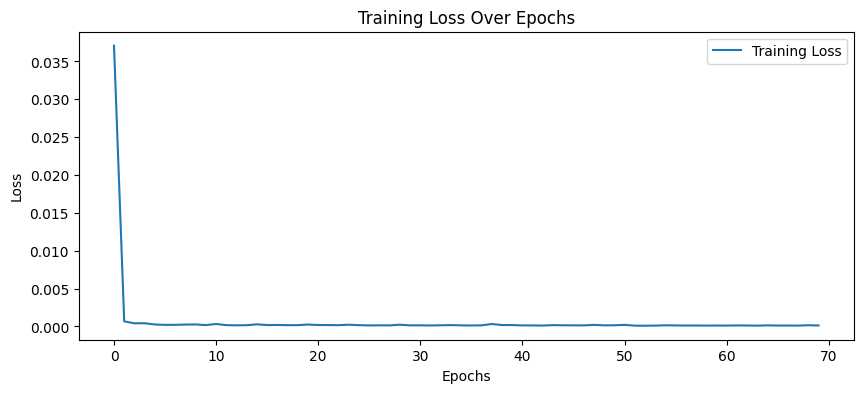

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


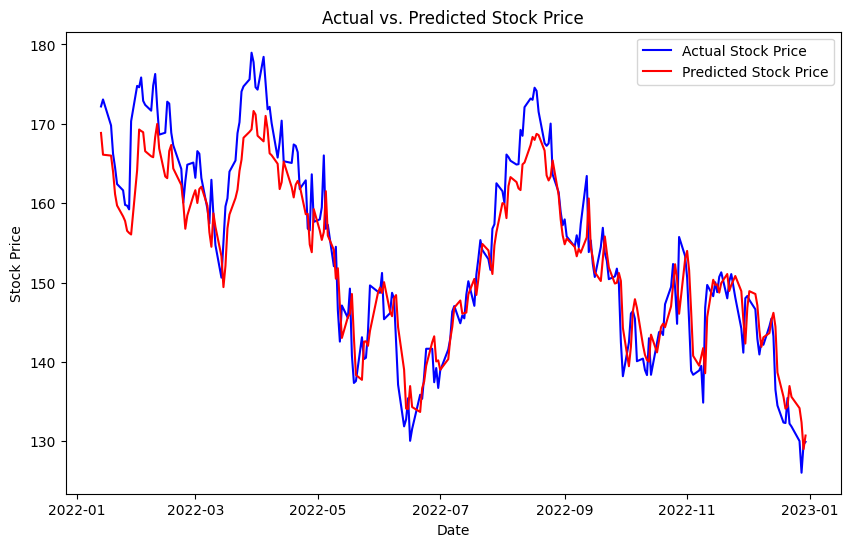

Test MSE Loss: 19.214592332387614


In [10]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Load dataset
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start="2015-01-01", end="2023-01-01")
data = data[['Close']]

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare training data
sequence_length = 160
X_train = []
y_train = []
for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=70, return_sequences=True), input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=70, return_sequences=True)))
# model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=70)))
# model.add(Dropout(0.2))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=70, batch_size=32, verbose=1)

# Plot training loss
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Prepare test data
X_test = []
y_test = data[train_size + sequence_length:]['Close'].values  # Actual test labels
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict on test data
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Plot actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + sequence_length:], y_test, label='Actual Stock Price', color='blue')
plt.plot(data.index[train_size + sequence_length:], predicted_prices, label='Predicted Stock Price', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Price')
plt.legend()
plt.show()

# Calculate and print test MSE
test_loss = mean_squared_error(y_test, predicted_prices)
print("Test MSE Loss:", test_loss)